In [2]:
import numpy as np
import pandas as pd

train_data= pd.read_csv("./Training_data.xls")
train_data.head()

,ID,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,1,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,2,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,3,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,4,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,5,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [3]:
#lets see the inside data and understand it 
print(train_data.shape)
print(train_data.info())

(148, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 31 columns):
ID                                     148 non-null int64
Sector                                 148 non-null object
Year                                   148 non-null int64
Month                                  148 non-null object
Cereals and products                   148 non-null float64
Meat and fish                          148 non-null float64
Egg                                    148 non-null float64
Milk and products                      148 non-null float64
Oils and fats                          148 non-null float64
Fruits                                 148 non-null float64
Vegetables                             148 non-null float64
Pulses and products                    148 non-null float64
Sugar and Confectionery                148 non-null float64
Spices                                 148 non-null float64
Non-alcoholic beverages                148 non-null

In [4]:
#check the null value or missing value in any feature
print(train_data.isnull().sum()/100)


ID                                     0.0
Sector                                 0.0
Year                                   0.0
Month                                  0.0
Cereals and products                   0.0
Meat and fish                          0.0
Egg                                    0.0
Milk and products                      0.0
Oils and fats                          0.0
Fruits                                 0.0
Vegetables                             0.0
Pulses and products                    0.0
Sugar and Confectionery                0.0
Spices                                 0.0
Non-alcoholic beverages                0.0
Prepared meals, snacks, sweets etc.    0.0
Food and beverages                     0.0
Pan, tobacco and intoxicants           0.0
Clothing                               0.0
Footwear                               0.0
Clothing and footwear                  0.0
Housing                                0.5
Fuel and light                         0.0
Household g

In [55]:
#for Housing there are some NAN value lets check % of it ,it is always suggest to impute value if dont have sufficient data 
print (train_data["Housing"].isnull().sum()/100)
print("Max of Housing value",train_data["Housing"].max())
print("Min of Housing value",train_data["Housing"].min())
print("Median of Housing value",train_data["Housing"].median())
print("Mean of Housing value",train_data["Housing"].mean())
#lets impute the value with the mean of it 
medianValue=train_data["Housing"].median()
train_data['Housing'] = train_data['Housing'].fillna(medianValue)


0.0
Max of Housing value 129.6
Min of Housing value 100.3
Median of Housing value 116.99183673469386
Mean of Housing value 116.99183673469392


In [6]:
#Now lets the drop the coloums which are not needed for the predcitions 
train_data=train_data.drop(columns=['ID','Sector','Year','Month'])
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 27 columns):
Cereals and products                   148 non-null float64
Meat and fish                          148 non-null float64
Egg                                    148 non-null float64
Milk and products                      148 non-null float64
Oils and fats                          148 non-null float64
Fruits                                 148 non-null float64
Vegetables                             148 non-null float64
Pulses and products                    148 non-null float64
Sugar and Confectionery                148 non-null float64
Spices                                 148 non-null float64
Non-alcoholic beverages                148 non-null float64
Prepared meals, snacks, sweets etc.    148 non-null float64
Food and beverages                     148 non-null float64
Pan, tobacco and intoxicants           148 non-null float64
Clothing                               148 non-null flo

# 1: Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the SelectKBest class2 that can be used
with a suite of diferent statistical tests to select a specific number of features. The example
below uses the chi-squared (chi2) statistical test for non-negative features to select 5 of the best
features to select the "Cereals and Products"

In [9]:
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import chi2
X=train_data.drop(["Cereals and products"],1)
y=train_data["Cereals and products"]
y=y.astype('int')
# feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, y)
df_scores =pd.DataFrame(fit.scores_)
features_cols=pd.DataFrame(X.columns)
#lets concat  for better under standing 
featureScores=pd.concat([features_cols,df_scores],axis=1)
featureScores.columns=['Features','score']
#featureScores['score']=featureScores['score'].astype('int')
#featureScores['score'] = featureScores['score'].apply(pd.to_numeric)
print(featureScores.nlargest(10,'score'))
# summarize scores
#set_printoptions(precision=2)
print(fit.scores_)
#features = fit.transform(X)
# summarize selected features
#print(Features[0:10,:])
#print(X.columns)


                               Features       score
6                   Pulses and products  708.730690
5                            Vegetables  248.323248
8                                Spices  175.951976
12         Pan, tobacco and intoxicants  158.415165
10  Prepared meals, snacks, sweets etc.  124.295152
4                                Fruits  111.954677
2                     Milk and products  108.113082
22                            Education   95.362304
13                             Clothing   94.389953
0                         Meat and fish   94.115839
[ 94.11583901  52.10430553 108.11308238  29.47491087 111.95467684
 248.32324841 708.73068982  46.83949319 175.95197588  47.2372412
 124.2951516   86.36837941 158.41516495  94.38995302  66.40869263
  90.15591668  36.32230956  45.41547989  67.05922786  57.97539443
  13.25874644  52.79953464  95.36230353  41.54304779  43.09404377
  70.61385026]


# 2. Feature Importance
we can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.


C:\Users\BijayNayak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04735467 0.02789783 0.03535284 0.03553982 0.03196532 0.04656873
 0.02950141 0.03478998 0.05837366 0.04111036 0.06740875 0.02766792
 0.03805368 0.03603572 0.02878412 0.03251957 0.02426913 0.02212752
 0.04094443 0.023074   0.02953561 0.08377391 0.0557385  0.03706842
 0.02976137 0.03478273]


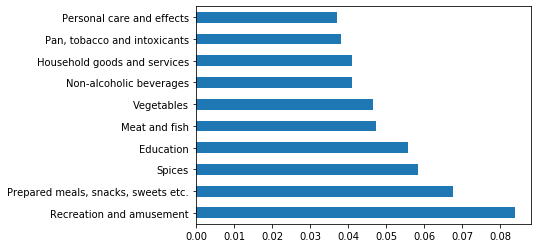

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# 3.Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

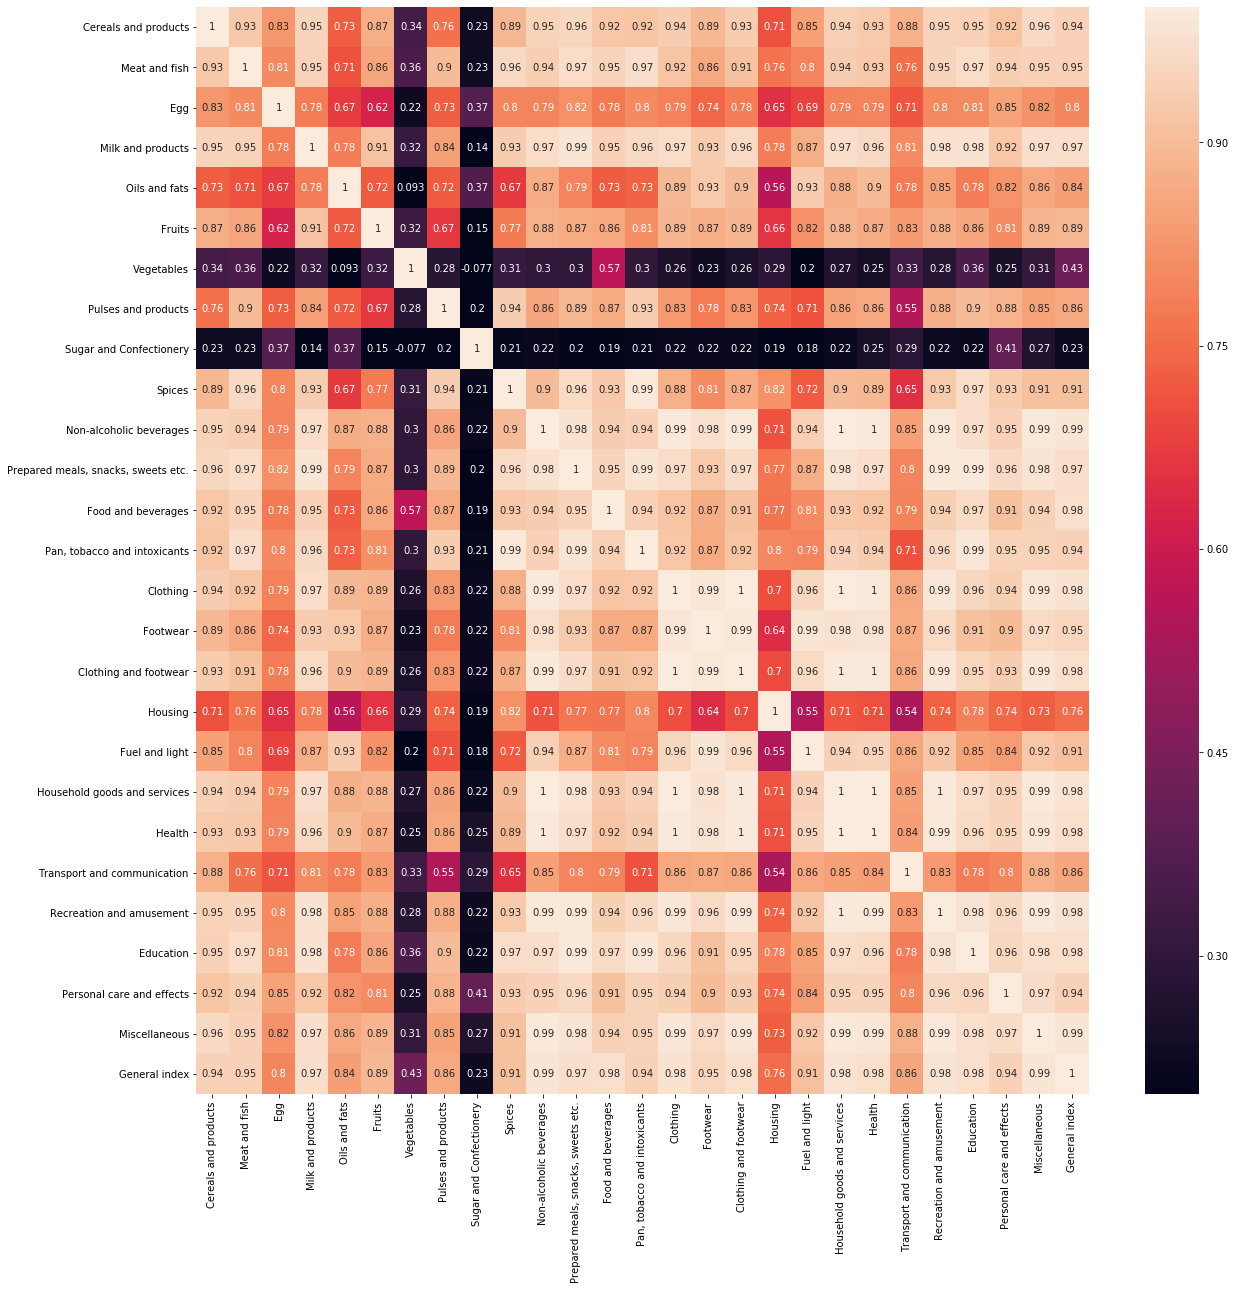

In [15]:
import seaborn as sns
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,robust= True)#,cmap="RdYlGn")

# 4:Principal Component Analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. Generally this is called a data reduction technique. A property of PCA is that
you can choose the number of dimensions or principal components in the transformed result.

In [24]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca = PCA(n_components=10)
fit=pca.fit(X)
print("Explained Variance:" ,fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: [7.63755310e-01 1.34969426e-01 5.15756885e-02 1.79128728e-02
 1.38001971e-02 7.15761144e-03 5.07822212e-03 3.15181572e-03
 1.00462776e-03 5.69611653e-04]
[[-1.93726168e-01 -1.26493628e-01 -1.97542469e-01 -9.17229750e-02
  -1.86028907e-01 -1.68525164e-01 -5.74314877e-01 -3.23240917e-02
  -2.63193483e-01 -1.29645194e-01 -2.19312465e-01 -1.84085966e-01
  -2.52521552e-01 -1.85288521e-01 -1.51353526e-01 -1.80463091e-01
  -1.12299532e-01 -1.20319115e-01 -1.54380322e-01 -1.42637596e-01
  -5.49404802e-02 -1.35708193e-01 -1.89236646e-01 -1.17460257e-01
  -1.21284234e-01 -1.62746189e-01]
 [-3.40280392e-03 -3.48073488e-02 -2.14505670e-02 -6.54089997e-02
   1.14378133e-02  9.68235402e-01 -1.39861217e-01 -6.89396320e-02
  -3.74345740e-02 -2.20427808e-02 -4.17384074e-02  9.88360908e-02
  -4.67956582e-02 -4.99057857e-02 -4.90424790e-02 -5.01967398e-02
  -1.15317083e-03 -4.53650187e-02 -3.94560941e-02 -4.55220252e-02
   9.85656699e-03 -3.18160192e-02 -8.94702318e-03 -3.58985086e-02

In [25]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.193726,-0.003403,Meat and fish
1,-0.126494,-0.034807,Egg
2,-0.197542,-0.021451,Milk and products
3,-0.091723,-0.065409,Oils and fats
4,-0.186029,0.011438,Fruits
5,-0.168525,0.968235,Vegetables
6,-0.574315,-0.139861,Pulses and products
7,-0.032324,-0.068940,Sugar and Confectionery
8,-0.263193,-0.037435,Spices
9,-0.129645,-0.022043,Non-alcoholic beverages


In [26]:
pca.explained_variance_ratio_

array([7.63755310e-01, 1.34969426e-01, 5.15756885e-02, 1.79128728e-02,
       1.38001971e-02, 7.15761144e-03, 5.07822212e-03, 3.15181572e-03,
       1.00462776e-03, 5.69611653e-04])

# 5:Feature Selection Using RFE
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. It uses the model accuracy to identify which
attributes (and combination of attributes) contribute the most to predicting the target attribute.


In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X,y)
rfe = RFE(lm, 10)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)
print(fit.n_features_)


[ True False  True False False False False False False  True False  True
 False False  True  True False False False False  True  True  True False
 False  True]
[ 1 15  1 11  7  2  4 10 16  1  8  1 12  5  1  1 14  9 13 17  1  1  1  3
  6  1]
26


In [37]:
support_ = pd.DataFrame(rfe.support_)
ranking_= pd.DataFrame(rfe.ranking_)
features_cols=pd.DataFrame(X.columns)
ranktable =pd.concat([features_cols,support_,ranking_],axis=1)
ranktable.columns=['Features','support_','rank']
#print(ranktable)
print(ranktable.loc[ranktable['rank']==1])
#df.loc[df['column_name'] == some_value]

                       Features  support_  rank
0                 Meat and fish      True     1
2             Milk and products      True     1
9       Non-alcoholic beverages      True     1
11           Food and beverages      True     1
14                     Footwear      True     1
15        Clothing and footwear      True     1
20  Transport and communication      True     1
21     Recreation and amusement      True     1
22                    Education      True     1
25                General index      True     1


# 6:VIF
Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset.Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [54]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#XX=X.drop(columns=['Meat and fish','Clothing and footwear','Egg','Milk and products','Oils and fats','Fruits','Vegetables'])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))
#print(vif.nlargest(10,'VIF Factor'))

    VIF Factor                             features
0      15215.9                        Meat and fish
1       2146.7                                  Egg
2      65583.5                    Milk and products
3      37754.3                        Oils and fats
4       8876.3                               Fruits
5      13273.1                           Vegetables
6       2458.9                  Pulses and products
7       1846.8              Sugar and Confectionery
8     157112.9                               Spices
9     142479.7              Non-alcoholic beverages
10    363962.0  Prepared meals, snacks, sweets etc.
11    727113.9                   Food and beverages
12    122827.4         Pan, tobacco and intoxicants
13   7144217.3                             Clothing
14    916410.0                             Footwear
15   9233923.1                Clothing and footwear
16      2417.9                              Housing
17     78766.0                       Fuel and light
18   1104263